### Different ways to do Linear regression in Python

In [ ]:
##### References
# https://medium.freecodecamp.org/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b
# https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

#### Data

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#Load dataset from sklearn
from sklearn import datasets
data = datasets.load_boston()

print(type(data)) #Gives a data of type Bunch(what ?)
print(data.DESCR)
print(data.feature_names) #Get feature names
print(data.target) # Print Target data
print(data.data)

<class 'sklearn.utils.Bunch'>
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupi

In [52]:
#Convert to dataframe
import pandas as pd
import numpy as np

#Data - features
df = pd.DataFrame(data.data,columns=data.feature_names)
print(df.head())

#Data - Target variable
Target = pd.DataFrame(data.target,columns = ['MEDV'])
print(Target.head())
df.columns

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

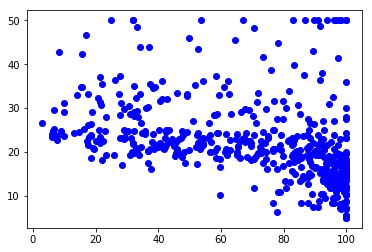

In [31]:
import matplotlib.pyplot as plt

plt.plot(df['AGE'],Target['MEDV'],'bo')

####  Scipy.Polyfit

In [49]:
from scipy import polyfit

help(polyfit)

Help on function polyfit in module numpy.lib.polynomial:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting polynomial
    rcond : float, optional
        Relative condition number of the fit. Singular values smaller than
        this relative to the largest singular value will be ignored. The
        default value is len(x)*eps, where eps is the

In [50]:
#Data - Input and Output
x = df['AGE']
y = Target['MEDV']
n = x.size

#Run the regression
(b1,b0) = polyfit(x,y,1)

#Error
ypred = b0 + b1*y
err = (np.sqrt(sum(ypred - y)**2)/n)

print("Linear regression output using ployfit")
print('parameters: Intercept=%.2f slope=%.2f, MSE = %.2f' % (b0,b1,err))

Linear regression output using ployfit
parameters: Intercept=30.98 slope=-0.12, MSE = 5.67


####  stats.linregress

In [47]:
from scipy import stats

help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

In [48]:
#Data - Input and Output
x = df['AGE']
y = Target['MEDV']
n = x.size

(b1,b0,R2,pvalue,stderr)= stats.linregress(x,y)

print("Linear regression output using lingress")
print('parameters: Intercept =%.2f slope=%.2f, R-square = %.2f, Std.error = %.2f' % (b0,b1,R2,stderr))

Linear regression output using lingress
parameters: Intercept =30.98 slope=-0.12, R-square = -0.38, Std.error = 0.01
